<a href="https://colab.research.google.com/github/rjnakano/manejo-inventarios-pdg/blob/main/Notebooks/TDG042521V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /usr/local/lib/python3.7/dist-packages (0.11.0)


In [2]:
# from google.colab import drive
import pathlib
import pandas as pd
import numpy as np
from pylab import *

from sklearn.preprocessing import StandardScaler

from kmodes.kprototypes import KPrototypes

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

from plotnine import *
import plotnine

In [3]:
plot_kwds = {'alpha' : 0.5, 's' : 1, 'linewidths':0}

In [4]:
if str(pathlib.Path().absolute()).find('content') >= 0:
    sourcepath = 'https://raw.githubusercontent.com/rjnakano/manejo-inventarios-pdg/main/Datos/Transformed'
else:
    sourcepath = '../Datos/Transformed'
print(sourcepath)    

https://raw.githubusercontent.com/rjnakano/manejo-inventarios-pdg/main/Datos/Transformed


In [5]:
# Dataset de inventarios sin dimensiones de los productos
df = pd.read_csv("{}/dfNoDims.csv".format(sourcepath))
df.drop('CONTRPERC', inplace=True, axis=1)
df['AISLE']=df['AISLE'].astype(str)

In [6]:
data1 = df

In [7]:
data1.dtypes

AISLE        object
IG           object
HTS          object
PLANNING     object
ABC          object
UOM          object
CAT          object
COSTX       float64
QTYVAR      float64
dtype: object

In [8]:
data1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11
...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,316.3834,1.00
16240,21,IG5,HTS67,1/0,C,BX,CAT2,626.9100,1.00
16241,22,IG5,HTS67,1/0,C,BX,CAT2,4959.6974,136.36
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-1322.5860,-100.00


In [9]:
numdf = data1[list(data1.select_dtypes('float64').columns)]
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR
0,-0.029671,-0.037167
1,0.092655,-0.006905
2,0.266138,0.020477
3,-0.024812,-0.044242
4,-0.077628,-0.046455
...,...,...
16239,0.098319,-0.033191
16240,0.163875,-0.033191
16241,1.078580,0.115063
16242,-0.247688,-0.143812


In [10]:
catdf = data1[list(data1.select_dtypes('object').columns)]

In [11]:
data1 = pd.concat((catdf, scaled_features_df), axis = 1)
data1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-0.029671,-0.037167
1,17,IG56,HTS119,1/1,B,PC,CAT17,0.092655,-0.006905
2,17,IG56,HTS119,1/1,C,PC,CAT17,0.266138,0.020477
3,17,IG56,HTS119,1/1,B,PC,CAT17,-0.024812,-0.044242
4,15,IG56,HTS119,1/1,C,PC,CAT17,-0.077628,-0.046455
...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,0.098319,-0.033191
16240,21,IG5,HTS67,1/0,C,BX,CAT2,0.163875,-0.033191
16241,22,IG5,HTS67,1/0,C,BX,CAT2,1.078580,0.115063
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-0.247688,-0.143812


In [12]:
catColumnsPos = [data1.columns.get_loc(col) for col in list(data1.select_dtypes('object').columns)]

In [13]:
# Fit the cluster 
k = 2
gamma = 0.5
import time
start_time = time.time()
kprototype = KPrototypes(n_jobs = -1, n_clusters = k, init = 'Huang', gamma = gamma, random_state = 0)
kprototype.fit_predict(data1, categorical = catColumnsPos)
print("--- %s seconds ---" % (time.time() - start_time))

--- 77.62690258026123 seconds ---


In [14]:
print(kprototype.cluster_centroids_)

[['-3.5160872662125153' '-0.11931448944660439' '37' 'IG64' 'HTS15' '1/1'
  'A' 'BX' 'CAT14']
 ['0.11604764967658525' '0.0039379472192550054' '2' 'IG45' 'HTS119' '1/1'
  'A' 'BX' 'CAT17']]


In [15]:
data1['Cluster'] = kprototype.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


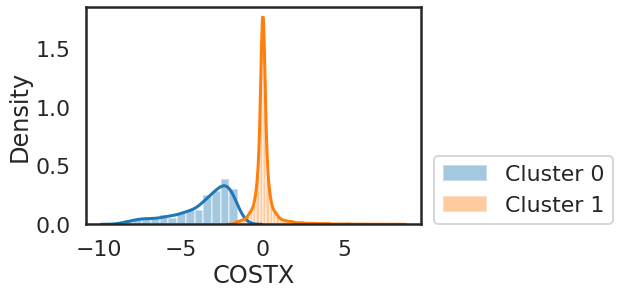

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


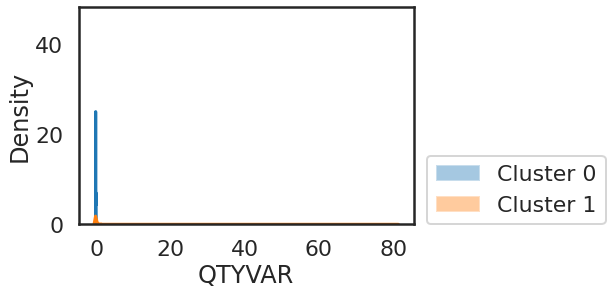

In [16]:
import matplotlib.pylab as plt
for var in ['COSTX','QTYVAR']:
    for i in range(k):
        sns.distplot(data1.loc[data1['Cluster']==i,var], label= 'Cluster {}'.format(i));
        plt.legend(loc=(1.04,0))
    plt.show();
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


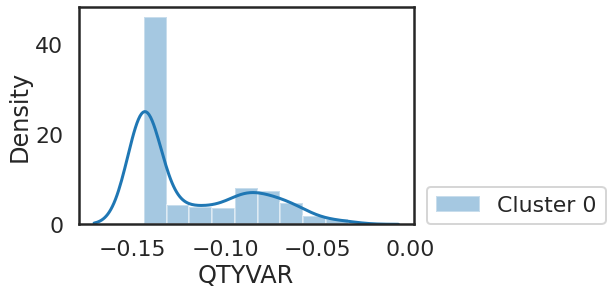

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


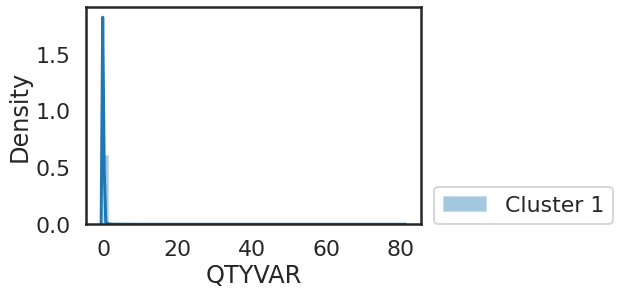

In [17]:
for i in range(k):
    sns.distplot(data1.loc[data1['Cluster']==i,'QTYVAR'], label= 'Cluster {}'.format(i));
    plt.legend(loc=(1.04,0))
    plt.show()

In [18]:
# Dataset original sin estandarizar
df['Cluster'] = kprototype.labels_
for i in range(k):
  print('Cluster',i,'\n');
  print(df[df['Cluster']==i].describe());
  print('\n');

Cluster 0 

              COSTX      QTYVAR  Cluster
count    519.000000  519.000000    519.0
mean  -16804.384576  -77.633295      0.0
std     7884.353514   28.707214      0.0
min   -40013.935000 -100.000000      0.0
25%   -21113.684250 -100.000000      0.0
50%   -14350.339300 -100.000000      0.0
75%   -10729.613450  -50.400000      0.0
max    -7169.298600    1.000000      0.0


Cluster 1 

              COSTX        QTYVAR  Cluster
count  15725.000000  15725.000000  15725.0
mean     400.360598     34.899781      1.0
std     3416.662175    927.770900      0.0
min    -8751.015300   -100.000000      1.0
25%     -610.770100    -49.060000      1.0
50%      -11.940800     -0.470000      1.0
75%      653.507700      5.410000      1.0
max    39709.661400  73950.000000      1.0




In [19]:
# Fit the cluster 
k = 3
gamma = 0.5
import time
start_time = time.time()
kprototype = KPrototypes(n_jobs = -1, n_clusters = k, init = 'Huang', gamma = gamma, random_state = 0)
kprototype.fit_predict(data1, categorical = catColumnsPos)
print("--- %s seconds ---" % (time.time() - start_time))

--- 60.80644750595093 seconds ---


In [20]:
print(kprototype.cluster_centroids_)

[['-0.04776515184800282' '-0.04319796811072735' '0.9997494048364867' '12'
  'IG45' 'HTS119' '1/1' 'C' 'PC' 'CAT17']
 ['-3.5225928208265898' '-0.11921972252083703' '0.0' '37' 'IG64' 'HTS15'
  '1/1' 'A' 'BX' 'CAT14']
 ['0.28432664152676096' '0.052465734577200974' '1.0' '2' 'IG14' 'HTS15'
  '1/1' 'A' 'BX' 'CAT8']]


In [21]:
data1['Cluster'] = kprototype.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

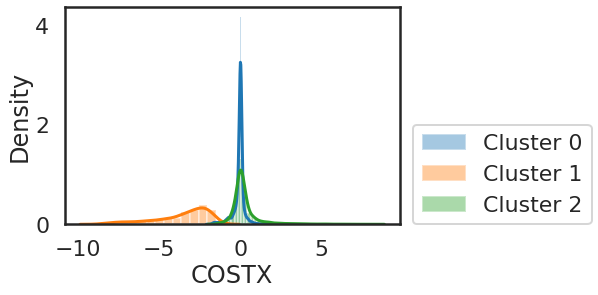

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

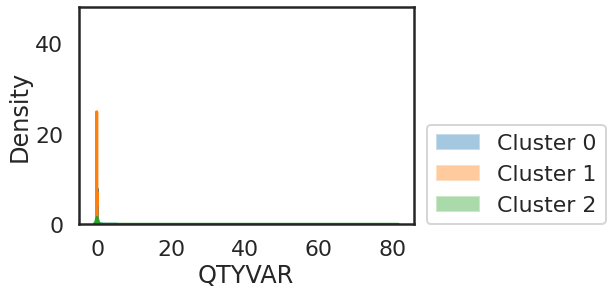

In [22]:
import matplotlib.pylab as plt
for var in ['COSTX','QTYVAR']:
    for i in range(k):
        sns.distplot(data1.loc[data1['Cluster']==i,var], label= 'Cluster {}'.format(i));
        plt.legend(loc=(1.04,0))
    plt.show();
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


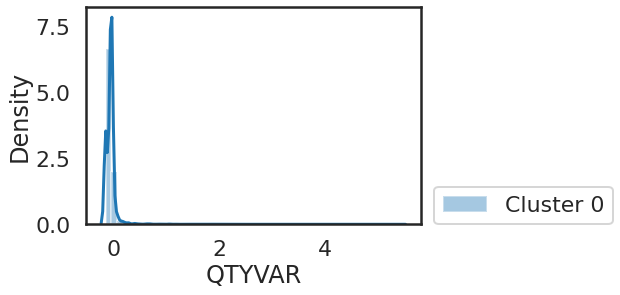

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


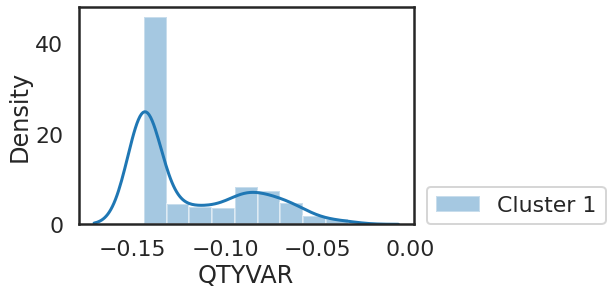

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


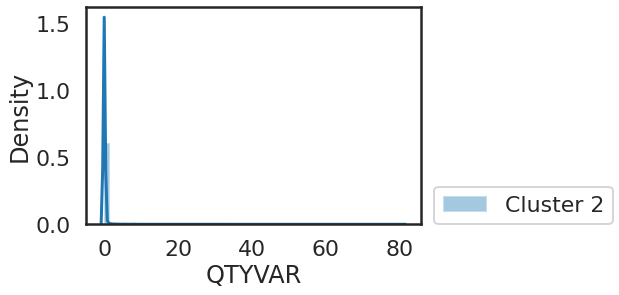

In [23]:
for i in range(k):
    sns.distplot(data1.loc[data1['Cluster']==i,'QTYVAR'], label= 'Cluster {}'.format(i));
    plt.legend(loc=(1.04,0))
    plt.show()

In [24]:
# Dataset original sin estandarizar
df['Cluster'] = kprototype.labels_
for i in range(k):
  print('Cluster',i,'\n');
  print(df[df['Cluster']==i].describe());
  print('\n');

Cluster 0 

              COSTX       QTYVAR  Cluster
count   7981.000000  7981.000000   7981.0
mean    -375.590068    -8.136687      0.0
std     1698.086923   150.723233      0.0
min    -9148.286500  -100.000000      0.0
25%     -549.199400   -55.020000      0.0
50%      -67.605700    -2.780000      0.0
75%      180.205000     2.310000      0.0
max    12995.952100  5000.000000      0.0


Cluster 1 

              COSTX      QTYVAR  Cluster
count    517.000000  517.000000    517.0
mean  -16835.200174  -77.546770      1.0
std     7883.952145   28.728937      0.0
min   -40013.935000 -100.000000      1.0
25%   -21158.281500 -100.000000      1.0
50%   -14350.339300 -100.000000      1.0
75%   -10800.923100  -50.190000      1.0
max    -7169.298600    1.000000      1.0


Cluster 2 

              COSTX        QTYVAR  Cluster
count   7746.000000   7746.000000   7746.0
mean    1197.466774     79.207068      2.0
std     4415.317055   1311.582926      0.0
min    -7415.654700   -100.000000      2.

In [25]:
# Dataset original sin estandarizar
for i in range(k):
  print('Cluster',i,'\n');
  print(data1[data1['Cluster']==i].describe(include='object'));
  print('\n');

Cluster 0 

       AISLE    IG     HTS PLANNING   ABC   UOM    CAT
count   7981  7981    7981     7981  7981  7981   7981
unique    43    62     108        3     3    13     16
top       12  IG45  HTS119      1/1     C    PC  CAT17
freq    1025  1530    3274     6253  3998  3685   3812


Cluster 1 

       AISLE    IG    HTS PLANNING  ABC  UOM    CAT
count    517   517    517      517  517  517    517
unique    42    48     49        3    3   12     13
top       37  IG64  HTS15      1/1    A   BX  CAT14
freq      75    95    133      444  392  351    196


Cluster 2 

       AISLE    IG    HTS PLANNING   ABC   UOM   CAT
count   7746  7746   7746     7746  7746  7746  7746
unique    42    64    105        3     3    13    15
top        2  IG14  HTS15      1/1     A    BX  CAT8
freq     959  1043   2183     6735  4890  4847  2122




In [26]:
# Dataset original sin estandarizar
for i in range(k):
  print('Cluster',i,'\n');
  print(data1[data1['Cluster']==i].describe(include='object'));
  print('\n');

Cluster 0 

       AISLE    IG     HTS PLANNING   ABC   UOM    CAT
count   7981  7981    7981     7981  7981  7981   7981
unique    43    62     108        3     3    13     16
top       12  IG45  HTS119      1/1     C    PC  CAT17
freq    1025  1530    3274     6253  3998  3685   3812


Cluster 1 

       AISLE    IG    HTS PLANNING  ABC  UOM    CAT
count    517   517    517      517  517  517    517
unique    42    48     49        3    3   12     13
top       37  IG64  HTS15      1/1    A   BX  CAT14
freq      75    95    133      444  392  351    196


Cluster 2 

       AISLE    IG    HTS PLANNING   ABC   UOM   CAT
count   7746  7746   7746     7746  7746  7746  7746
unique    42    64    105        3     3    13    15
top        2  IG14  HTS15      1/1     A    BX  CAT8
freq     959  1043   2183     6735  4890  4847  2122


